In [1]:
import glob
import pandas as pd
import wandb
import itertools
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.cm import coolwarm
from matplotlib.colors import Normalize

In [4]:
def find_pkl_file(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.pkl'):
                return os.path.join(root, file)
    return None

In [5]:
# run_path = "alexhg/Branin budget data set/27japxej"
# api = wandb.Api()
# eps = 1e-3
# run = api.run(run_path)
# logdir = "/network/scratch/n/nikita.saxena/logs/activelearning/2023-05-01_13-49-40"

logdir = "/home/mila/n/nikita.saxena/activelearning/storage/scratch/2023-05-04_06-27-11"
# logdir = "/home/mila/n/nikita.saxena/activelearning/storage/scratch/2023-05-04_06-27-12"

In [6]:
culm_pkl_file = find_pkl_file(logdir)
culm_pkl = pd.read_pickle(culm_pkl_file)
culm_samples = culm_pkl['cumulative_sampled_samples']
culm_energies = culm_pkl['cumulative_sampled_energies'].detach().cpu().numpy()
culm_states = np.array(culm_pkl['cumulative_sampled_states'])
culm_fidelities = culm_pkl['cumulative_sampled_fidelities'].detach().cpu().numpy()
culm_states_naked = culm_states[:, :-1]

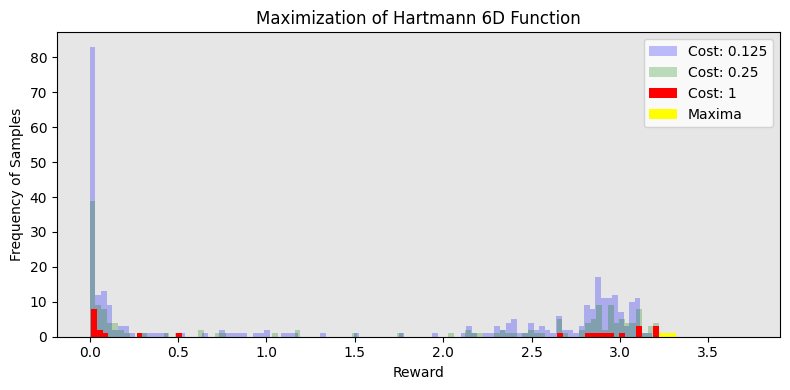

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
fid_color = {0: 'b', 1: 'g', 2: 'r'}
fid_label = {0: 'Cost: 0.125', 1: 'Cost: 0.25', 2: 'Cost: 1'}
alpha = {0: 0.25, 1: 0.25, 2: 1}
for i in range(3):
    idx = np.where(culm_fidelities == i)[0]
    energies_for_idx = culm_energies[idx]
    color = fid_color[i]
    # energies_for_idx = energies_for_idx * -1
    ax.hist(energies_for_idx, bins=100, color=color, alpha=alpha[i], label=fid_label[i])

ax.hist(np.array([3.22]), color='yellow', label='Maxima')
# ax.legend(['Cost: 0.01', 'Cost: 0.1', 'Cost: 1', 'Modes'])
ax.set_title('Maximization of Hartmann 6D Function')
ax.set_xlabel('Reward')
ax.set_ylabel('Frequency of Samples')
# Adjust the spacing between subplots
plt.tight_layout()
ax.legend(loc='upper right')
# ax.grid(True, linestyle='--')
# set background color
ax.set_facecolor('#E6E6E6')
# Show the plot
plt.show()

In [19]:
energies_for_idx

array([3.10323486, 3.05323674])